
Clustering
KNN
Random Forest


# Introduction

In this task, we explore the difference in crime rates between various US States using
unsupervised learning methods such as Principal Component Analysis (PCA) and
various clustering techniques. We will look at the murder, assault and rape cases across 49 states.

# Exploring the data

In [253]:
# Import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [254]:
# Load the dataset
df = pd.read_csv('UsArrests.csv')
df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


The crime rates are measured per 100,000 people with the urban population being provided as a percentage.

In [255]:
# The states are called City in the table so we will rename the column
df.rename(columns={'City':'State'}, inplace=True)

In [256]:
# Check for missing data
df.isna().sum()

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [257]:
# Check the description of the data
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [258]:
# Look at the type of data in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


We are blessed in the fact the dataset has no missing data.

/var/folders/k1/nmqy08494w9880ps3yhnzm_w0000gn/T/ipykernel_1489/834078284.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


<AxesSubplot: >

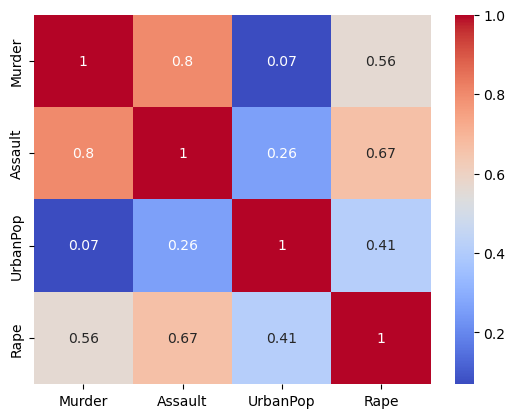

In [259]:
# Check for correlation between the data
df_corr = df.corr()
sns.heatmap(df_corr, cmap='coolwarm', annot=True)

Looking at the heat map we can a strong correlation between assault and murder. As well as rape and assault. We can also see that in an area of higher urban population. Let's now plot each crime by urban population to gain a better understanding of how the rates of the different crimes are situaated.

Text(0.5, 1.0, 'Murder Rate by State')

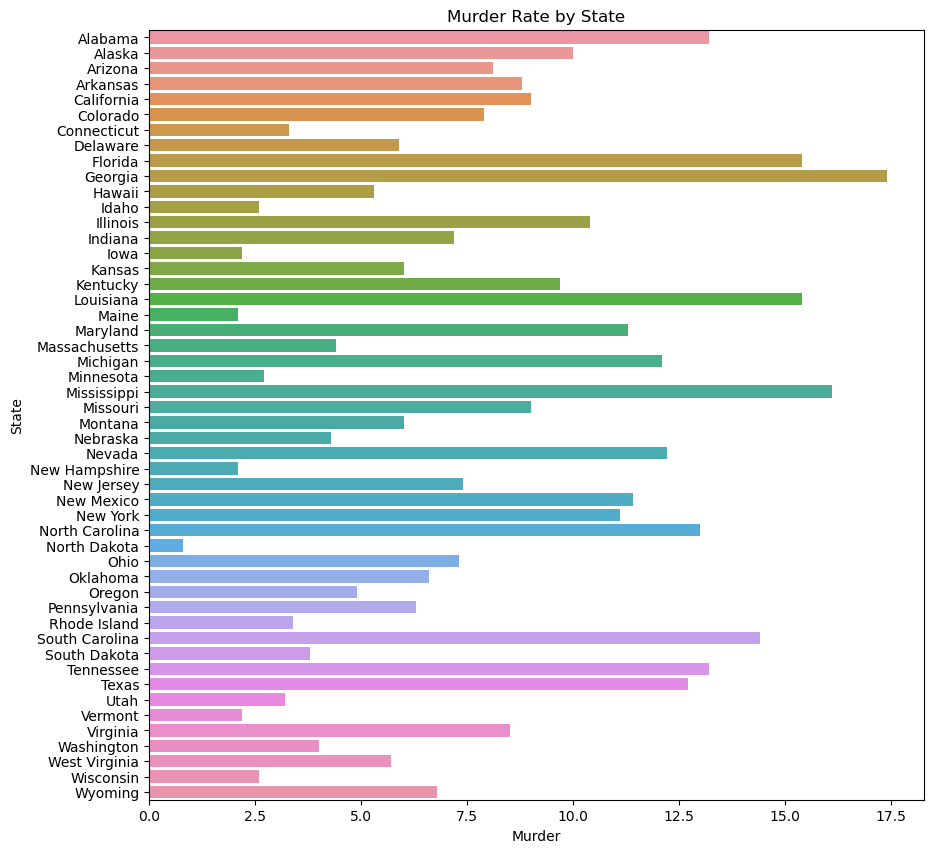

In [260]:
# Murder
plt.figure(figsize=(10,10))
sns.barplot(data=df, x="Murder", y='State')
plt.title('Murder Rate by State')

We can see that the Georgia and Mississippi have the 2 highest murder rates respectively.

Text(0.5, 1.0, 'Rape Rate by State')

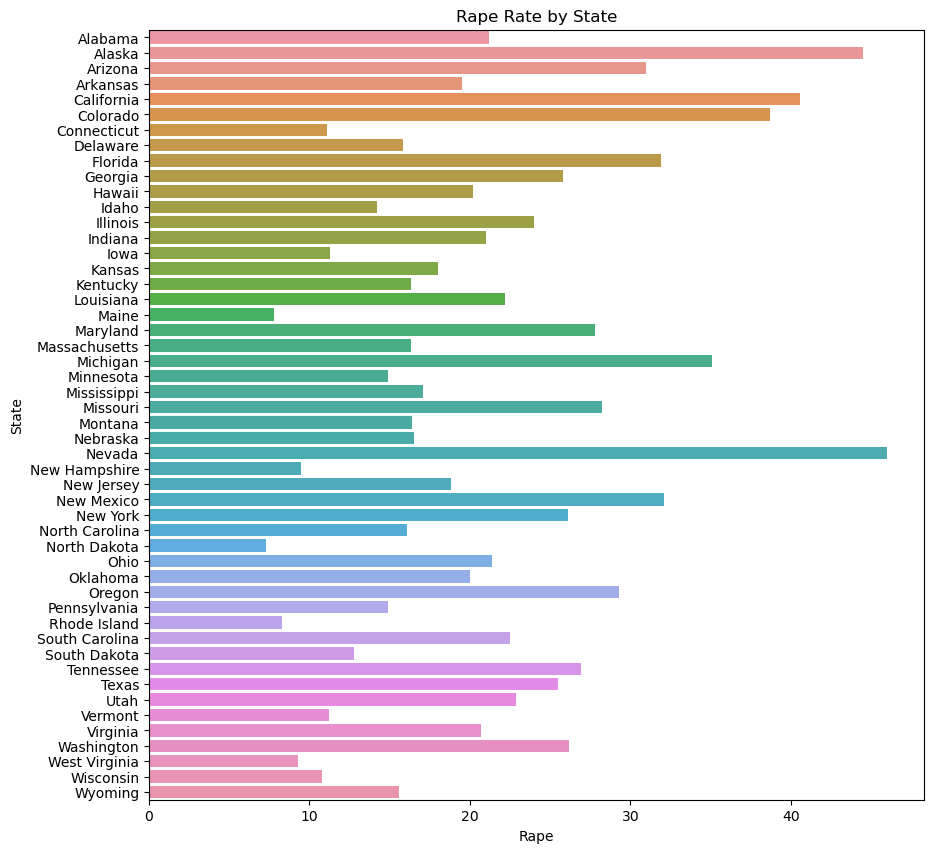

In [261]:
# Rape
plt.figure(figsize=(10,10))
sns.barplot(data=df, x="Rape", y="State")
plt.title('Rape Rate by State')

When looking at rape we can see that Nevada and Alaska have the highest rates.

Text(0.5, 1.0, 'Rape Rate by State')

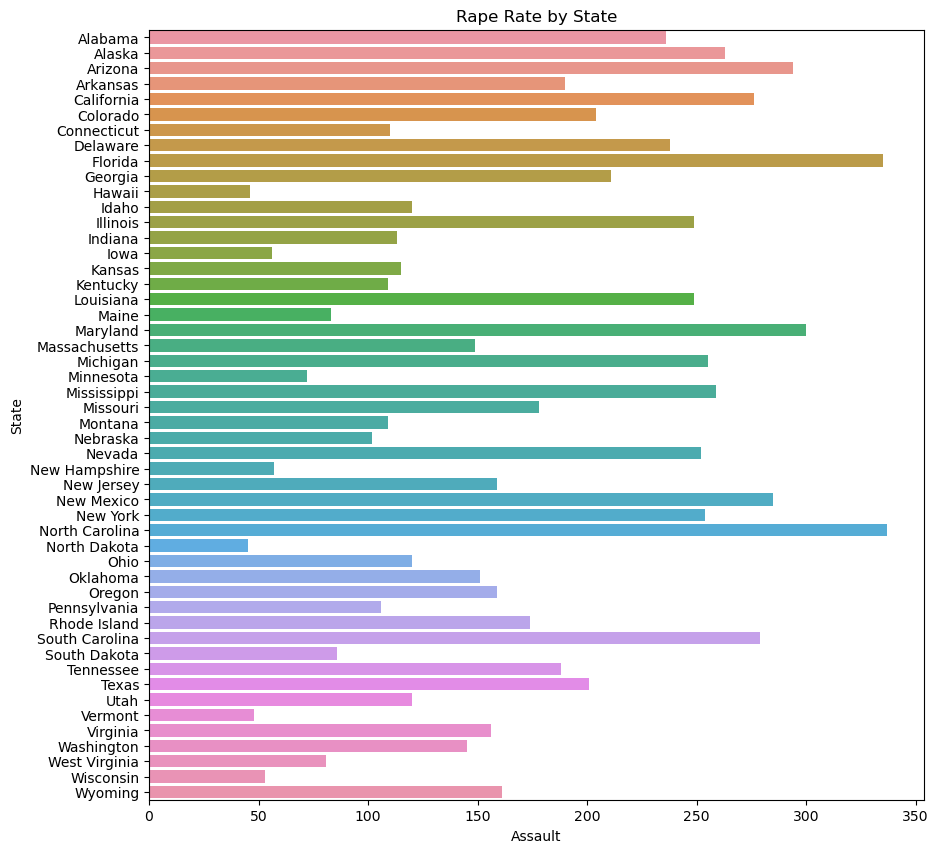

In [262]:
# Assault
plt.figure(figsize=(10,10))
sns.barplot(data=df, x="Assault", y="State")
plt.title('Rape Rate by State')

We can see that North Carolina and Florida have the highest rate of assault.

# Unsupervised Learning

We will now look at the unsupervised machine learning techniques that can be used to cluster the data points based on their similarities or differences. 

In [263]:
# Scaling the data
df = df.set_index('State')
# Create an instance of the StandardScaler class
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
scaled_data = scaler.fit_transform(df)

# Convert the scaled data array back to a Pandas dataframe
scaled_df = pd.DataFrame(scaled_data, columns=df.columns, index=df.index)

scaled_df.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814


### K Means Clustering

In [264]:
# Create an instance of KMeans with 3 clusters
kmeans = KMeans(n_clusters=3)

# Fit the KMeans model to the standardized data
kmeans.fit(scaled_data)

# Get the labels and centroids of the clusters
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Add the labels to the original dataframe
df['KCluster'] = labels

# Print the resulting dataframe with cluster assignments
df.head()

,Murder,Assault,UrbanPop,Rape,KCluster
State,,,,,
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1


In [265]:
scaled_df['KCluster'] = labels
scaled_df.head()

,Murder,Assault,UrbanPop,Rape,KCluster
State,,,,,
Alabama,1.255179,0.790787,-0.526195,-0.003451,1
Alaska,0.513019,1.118060,-1.224067,2.509424,1
Arizona,0.072361,1.493817,1.009122,1.053466,1
Arkansas,0.234708,0.233212,-1.084492,-0.186794,2
California,0.281093,1.275635,1.776781,2.088814,1


Now that we've applied our clustering let's create box plots to each of the crimes to establish criteria for safety rate when we move onto out plot clusters.

<AxesSubplot: xlabel='KCluster', ylabel='Murder'>

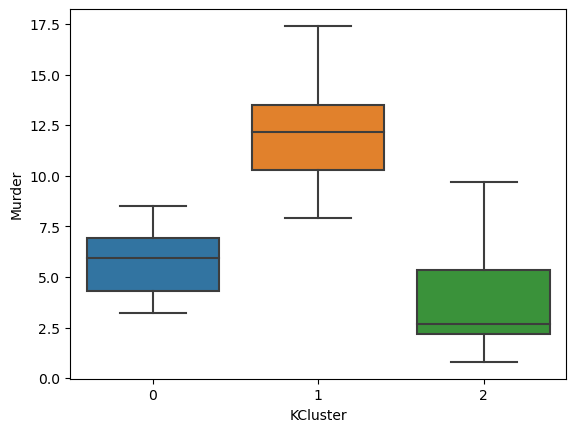

In [266]:
# Murder boxplot
sns.boxplot(data=df, y='Murder', x='KCluster')

<AxesSubplot: xlabel='KCluster', ylabel='Rape'>

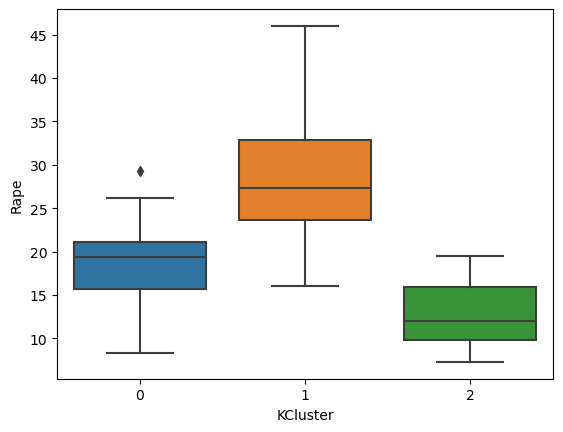

In [267]:
# Rape boxplot
sns.boxplot(data=df, y='Rape', x='KCluster')

<AxesSubplot: xlabel='KCluster', ylabel='Assault'>

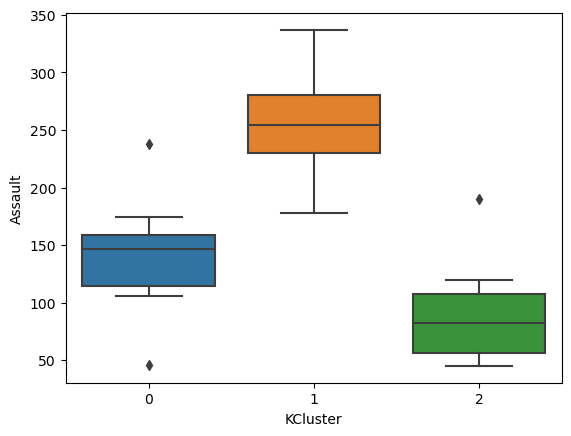

In [268]:
# Assault boxplot
sns.boxplot(data=df, y='Assault', x='KCluster')

We can see that from the above boxplots cluster 0 will be 'Medium Risk', cluster 1 will be defined as 'Low Risk', and cluster 3 will be deemed 'High Risk'.

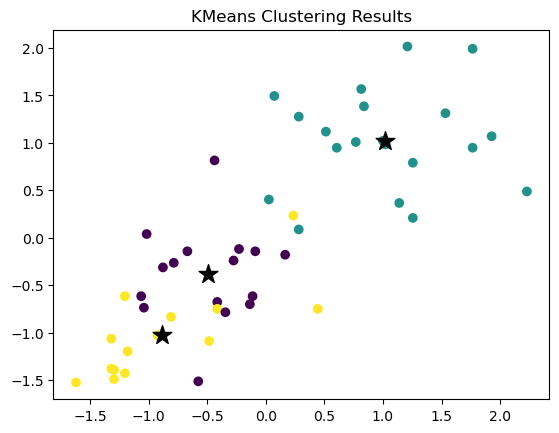

In [269]:
# plot the clusters using assault and murder
'''
plt.scatter(scaled_data[:,0], scaled_data[:,1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=200, c='#050505')
plt.title('KMeans Clustering Results')
plt.show()
'''

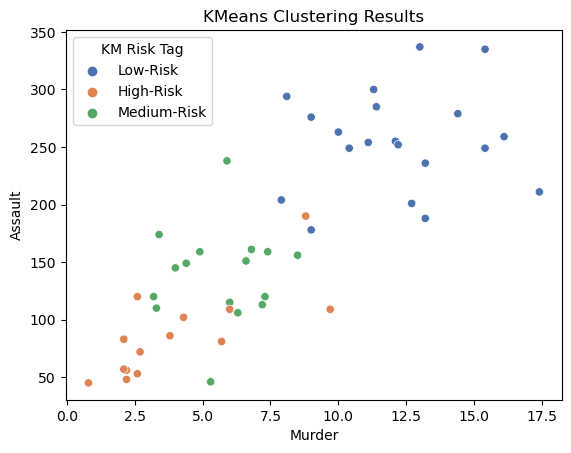

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


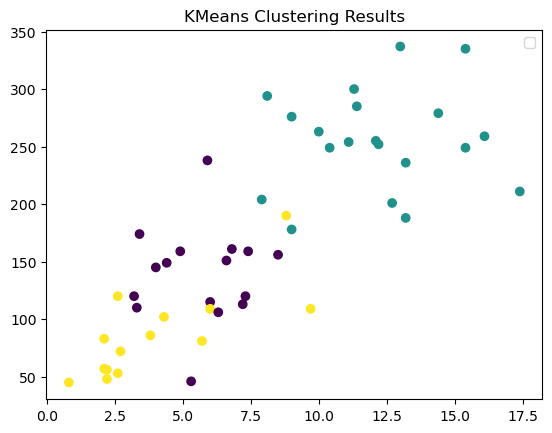

In [273]:
# plot the clusters using assault and murder
'''
plt.scatter(df['Murder'],df['Assault'], c=df['KCluster'])
plt.title('KMeans Clustering Results')
plt.legend()
plt.show()
'''

# Hierarchical clustering

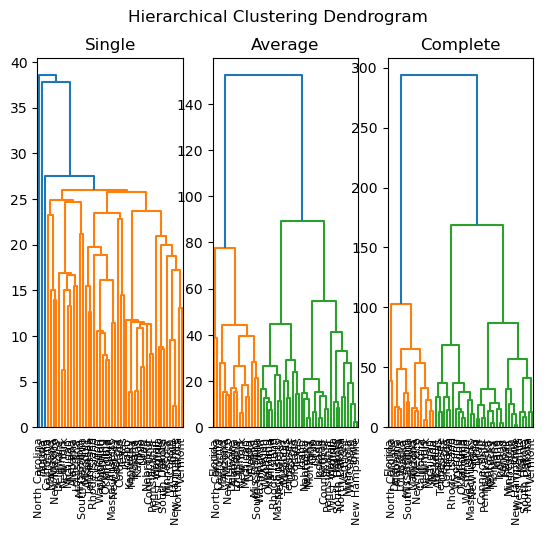

In [284]:
# Import the libraries
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Create the clustering model
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(df)

# Plot the models
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Hierarchical Clustering Dendrogram')
ax1.set_title("Single")
dendrogram(linkage(df, method='single'), labels=df.index, ax=ax1)
ax2.set_title("Average")
dendrogram(linkage(df, method='average'), labels=df.index, ax=ax2)
ax3.set_title("Complete")
dendrogram(linkage(df, method='complete'), labels=df.index, ax=ax3)
plt.show()

The complete linkage method creates the most balanced cluster dispersion, making it the preferred choice for the rest of the analysis. See the clear dendrogram below.

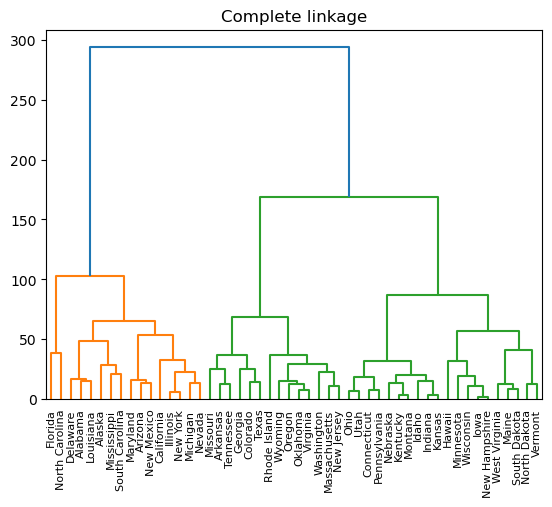

In [285]:
plt.title("Complete linkage")
dendrogram(linkage(df, method='complete'), labels=df.index)
plt.show()

We can see from the above dendogram that we should be have 3 clusters. We can extrapolate that from looking at the highest horizontal line and seeing the vertical lines that can be accounted for at that level.

In [286]:
# Apply the defined clusters to the model
AC = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='complete')
y_pred = AC.fit_predict(df)
y_pred

array([0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0,
       1, 0, 2, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1,
       1, 2, 2, 1, 1, 2])

In [287]:
df['ACluster'] = y_pred
df.head()

,Murder,Assault,UrbanPop,Rape,KCluster,ACluster
State,,,,,,
Alabama,13.2,236,58,21.2,1,0
Alaska,10.0,263,48,44.5,1,0
Arizona,8.1,294,80,31.0,1,0
Arkansas,8.8,190,50,19.5,2,2
California,9.0,276,91,40.6,1,0


Now that we've applied our custering technique and added the column, lets redo the box plots but for the AC clusters.

<AxesSubplot: xlabel='ACluster', ylabel='Murder'>

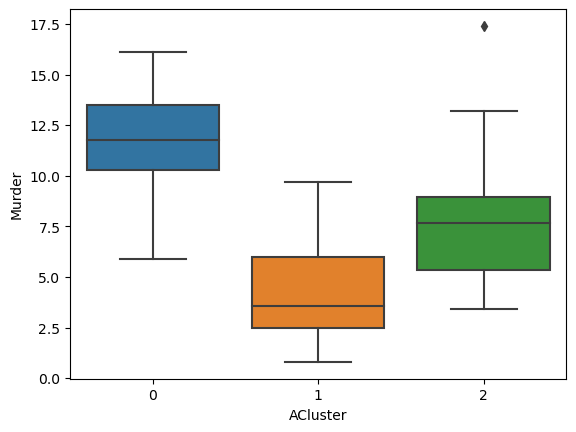

In [288]:
# Murder boxplot
sns.boxplot(data=df, y='Murder', x='ACluster')

<AxesSubplot: xlabel='ACluster', ylabel='Rape'>

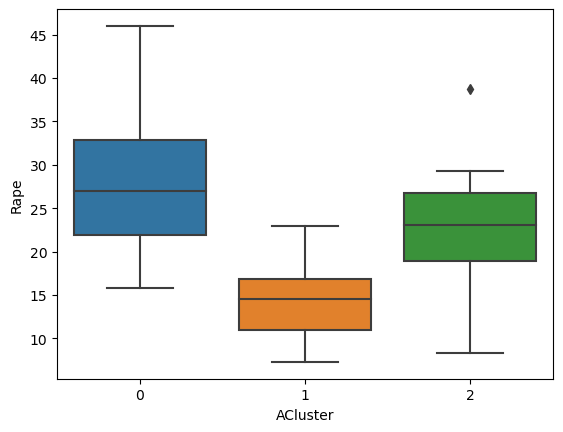

In [289]:
# Rape boxplot
sns.boxplot(data=df, y='Rape', x='ACluster')

<AxesSubplot: xlabel='ACluster', ylabel='Assault'>

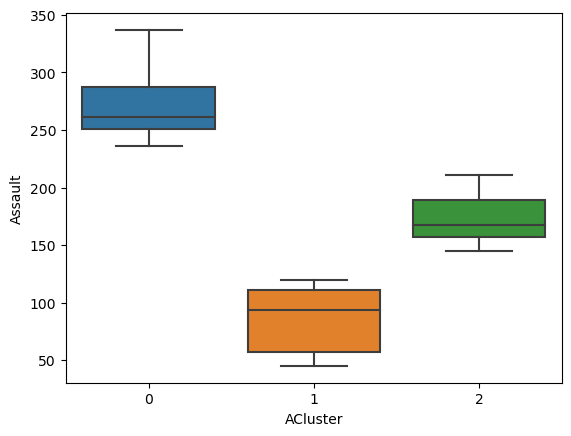

In [290]:
# Assault boxplot
sns.boxplot(data=df, y='Assault', x='ACluster')

From the boxplots we can define cluster '0' as 'High Risk', '1' as 'Low Risk', and '2' as 'Medium Risk'.

# Plotting the difference in clustering techniques

We will plot each of the clustering techniques and establish where there we similarities a differences. 

We will first map the risk profiles depending on the clustering number

In [314]:
# Hierarchical Clustering
# Create a new column with the risk mapping
AC_mapping = {0:'High-Risk', 1:'Low-Risk', 2:'Medium-Risk'}
df['AC Risk Tag'] = df['ACluster'].map(AC_mapping)

In [317]:
# K Means Clustering
# Create a new column with the risk mapping
KM_mapping = {0:'Medium-Risk', 1:'High-Risk', 2:'Low-Risk'}
df['KM Risk Tag'] = df['KCluster'].map(KM_mapping)

Now we will plot both clutering techniques looking at the highest correlated pieces of data - Assault & Murder.

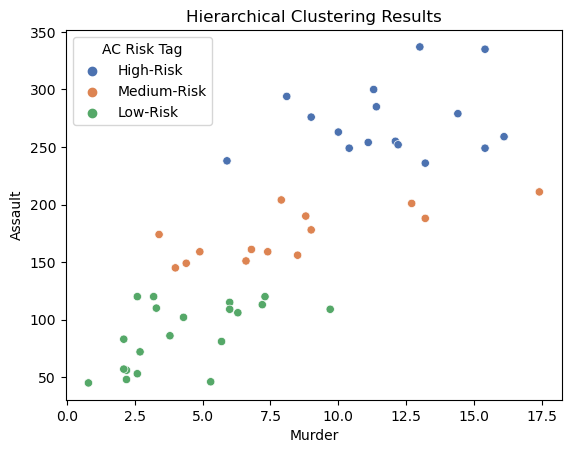

In [320]:
sns.scatterplot(data=df, x='Murder', y='Assault', hue='AC Risk Tag', palette='deep')
plt.title('Hierarchical Clustering Results')
plt.show()

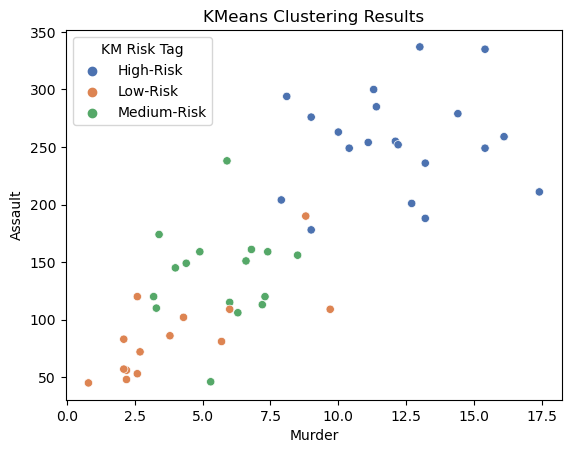

In [318]:
sns.scatterplot(data=df, x='Murder', y='Assault', hue='KM Risk Tag', palette='deep')
plt.title('KMeans Clustering Results')
plt.show()

# Conclusion

We can see that Hierarchical clustering has created more defined clusters, where there is no overlapping or outliers. But the clusters appear to be clearly split on assault criteria. With some outlier and high crime rates being defined in a lower category.

With K-Means clustering we can see again clearly defined areas but with this method there is partially more overlapping of the data. Some of the datapoints clustered in low risk is actually plotted with high risk as well as some medium risk clustered data points being associated with low risk.

The are benefits and draw backs to either technique. We could try imporoving the clustering.